## import modules

In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
arr0 = torch.tensor([[3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
print(arr0)
print(arr0.shape)

tensor([[3., 4., 5.],
        [6., 7., 8.]])
torch.Size([2, 3])


In [4]:
arr1 = np.array([[1,2,3],[4,5,6]])
print(arr1)
t_array1 = torch.from_numpy(arr1)
print(t_array1)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [5]:
torch.manual_seed(0)
arr3 = torch.rand((2,3))
print(arr3)
print(arr3.shape)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
torch.Size([2, 3])


In [6]:
print(arr0 + arr3)

tensor([[3.4963, 4.7682, 5.0885],
        [6.1320, 7.3074, 8.6341]])


In [7]:
print(arr0 * arr3)

tensor([[1.4888, 3.0729, 0.4424],
        [0.7922, 2.1520, 5.0726]])


In [8]:
print(arr0.T.matmul(arr3))
print(arr3.T.matmul(arr0).T)

tensor([[2.2810, 4.1492, 4.0699],
        [2.9092, 5.2248, 4.7925],
        [3.5375, 6.3005, 5.5150]])
tensor([[2.2810, 4.1492, 4.0699],
        [2.9092, 5.2248, 4.7925],
        [3.5375, 6.3005, 5.5150]])


In [9]:
bias = torch.tensor([30.0, 40.0, 50.0])
print(arr0 + bias)

tensor([[33., 44., 55.],
        [36., 47., 58.]])


# einsum

## trace

In [10]:
m1 = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
m2 = torch.tensor([[10,20,30,40],[50,60,70,80],[90,100,110,120],[130,140,150,160]])
print(m1)
torch.einsum('ii', m1)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])


tensor(34)

## diagonal

In [11]:
torch.einsum('ii->i', m1)

tensor([ 1,  6, 11, 16])

## outer product

In [12]:
arr1 = torch.tensor([1,2,3,4,5])
arr2 = torch.tensor([10,20,30,40,50])
torch.einsum('i,j->ij', arr1, arr2)

tensor([[ 10,  20,  30,  40,  50],
        [ 20,  40,  60,  80, 100],
        [ 30,  60,  90, 120, 150],
        [ 40,  80, 120, 160, 200],
        [ 50, 100, 150, 200, 250]])

## batch matrix multiplication

In [13]:
As = torch.randn(3,2,5)
Bs = torch.randn(3,5,4)
torch.einsum('bij,bjk->bik', As, Bs)

tensor([[[-1.1223,  2.8596,  0.1298,  1.4445],
         [-1.8879, -0.9510,  0.9330, -0.7948]],

        [[ 0.9520, -4.9026, -1.3021, -3.0249],
         [-0.5488,  1.0961, -1.6959,  0.4218]],

        [[-1.7572, -3.7664,  2.5861, -2.6032],
         [ 2.2228, -0.8318, -2.5297, -0.6959]]])

## batch permute

In [14]:
A = torch.randn(2, 3, 4, 5)
torch.einsum('...ij->...ji', A).shape

torch.Size([2, 3, 5, 4])

## equivalent to torch.nn.functional.bilinear

In [15]:
A = torch.randn(3,5,4)
l = torch.randn(2,5)
r = torch.randn(2,4)
torch.einsum('bn,anm,bm->ba', l, A, r)

tensor([[-1.3928, -3.9263,  3.2407],
        [-0.8054,  0.9632,  1.4130]])

# Simple optimization

In [54]:
x = torch.tensor([1.0, -4.0], requires_grad=True)
optimum = torch.tensor([3.0, 1.0])
print(x)
print(loss)

tensor([ 1., -4.], requires_grad=True)
tensor(18.9118, grad_fn=<DotBackward>)


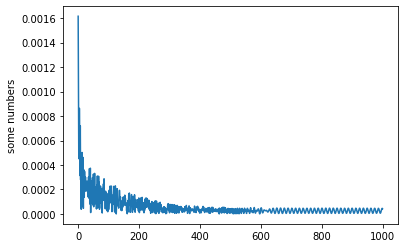

[3.0040104 1.0009907]
[3. 1.]


In [68]:
optimizer = torch.optim.RMSprop([x], lr=0.005)
losses = []
for iter in range(10000):
    if iter % 10 == 0:
        with torch.no_grad():
            #print( '%s: %s -> %s' % (iter, x.numpy(), loss.numpy()))
            losses.append(loss.numpy())
    loss = (x-optimum).dot(x-optimum)
    
    loss.backward()
    optimizer.step()

plt.plot(losses)
plt.ylabel('some numbers')
plt.show()
print('found %s: ' % (x.detach().numpy()))
print('optimum %s: ' % (optimum.numpy()))
   